In [1]:
import opendatasets as od

In [2]:
link=r'https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales?select=supermarket_sales+-+Sheet1.csv'
od.download(link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  shahrizwan52


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales


100%|██████████████████████████████████████████████████████████████████████████████| 35.9k/35.9k [00:00<00:00, 211kB/s]

In [9]:
import os
import pandas as pd
file_path=r'C:\Users\Rizwan\Downloads\Shah Rizwan\Python data analyst project\Supermarket sales\supermarket-sales\supermarket_sales - Sheet1.csv'

clean_path = os.path.normpath(file_path)
df=pd.read_csv(clean_path,encoding='unicode_escape')

In [10]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [13]:
df.count()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

no null value in the dataset

In [22]:
#df['Branch'].unique()
#df['City'].unique()
#df['Customer type'].unique()
#df['Gender'].unique()
#df['Product line'].unique()
#df['Payment'].unique()




array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [23]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [24]:
df['Date']=pd.to_datetime(df['Date'])

In [25]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [26]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

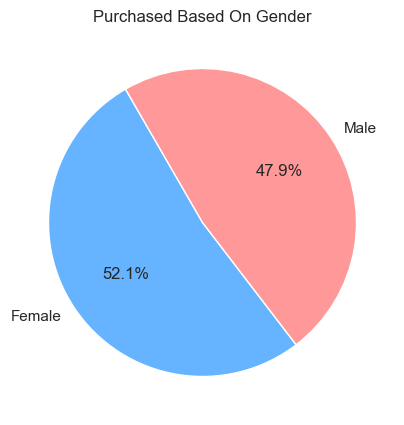

In [60]:

total_pucrhased_gender_counts=df.groupby('Gender')['Quantity'].sum()
#total_pucrhased_gender_counts

sns.set(rc={'figure.figsize':(5,5)})
plt.pie(total_pucrhased_gender_counts,labels=total_pucrhased_gender_counts.index,autopct='%1.1f%%',colors=['#66b3ff', '#ff9999'], startangle=120)
plt.title('Purchased Based On Gender')  
plt.show()





           Female purchased slightly more than Male

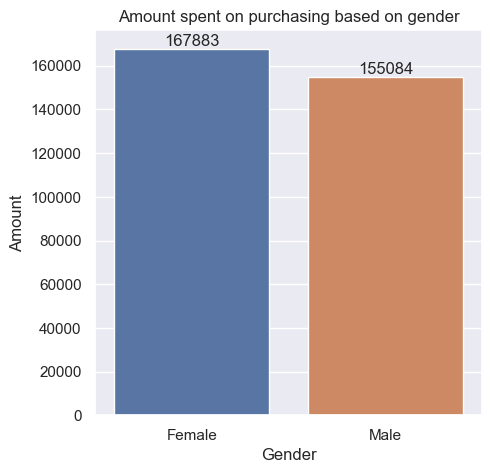

In [68]:

sales_gen=df.groupby(['Gender'],as_index=False)['Total'].sum()
ax=sns.barplot(x='Gender',y='Total',hue='Gender',data=sales_gen)
plt.ylabel('Amount')
plt.title('Amount spent on purchasing based on gender')

for bar in ax.containers:
    ax.bar_label(bar)

plt.show()

From above graph we can say that Female purchase slightly more than male with more Amount Spent on Purchasing

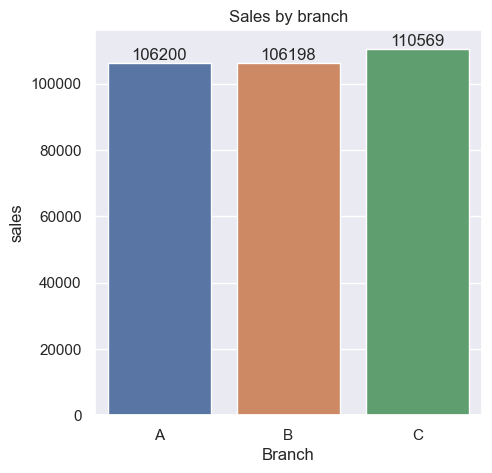

In [71]:
sales_branch=df.groupby(['Branch'],as_index=False)['Total'].sum()
ax=sns.barplot(x='Branch',y='Total',hue='Branch',data=sales_branch)
plt.ylabel('sales')
plt.title('Sales by branch')

for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

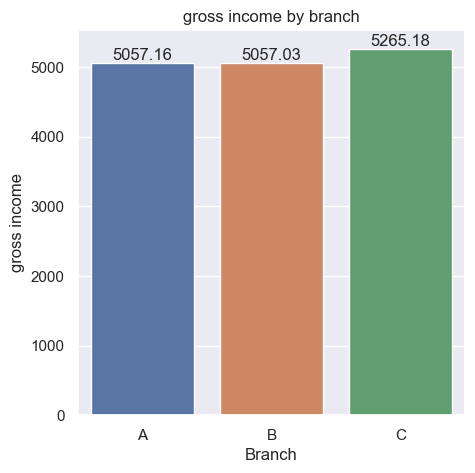

In [78]:
gross_income_branch=df.groupby(['Branch'],as_index=False)['gross income'].sum()
ax=sns.barplot(x='Branch',y='gross income',hue='Branch',data=gross_income_branch)
plt.ylabel('gross income')
plt.title('gross income by branch')

for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

Branch  C   has slightly more sales and gross margin than other two branches 

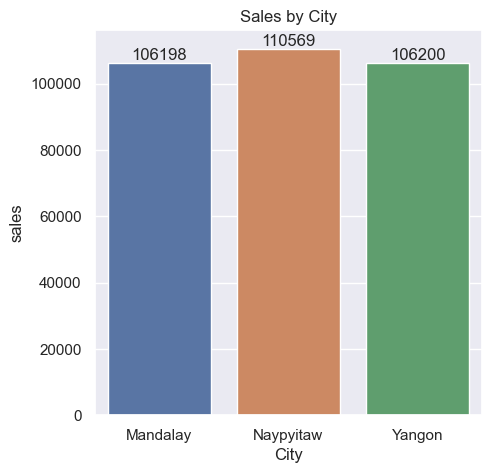

In [75]:
sales_city=df.groupby(['City'],as_index=False)['Total'].sum()
ax=sns.barplot(x='City',y='Total',hue='City',data=sales_city)
plt.ylabel('sales')
plt.title('Sales by City')

for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

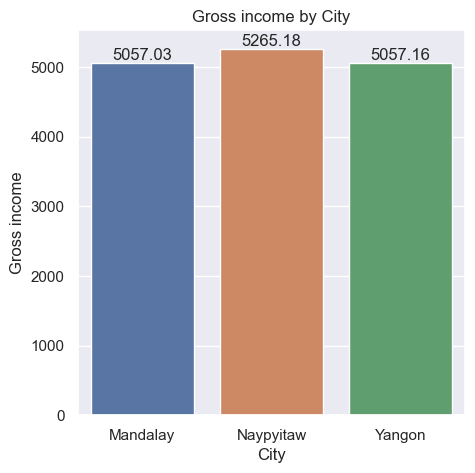

In [81]:
gross_income_City=df.groupby(['City'],as_index=False)['gross income'].sum()
ax=sns.barplot(x='City',y='gross income',hue='City',data=gross_income_City)
plt.ylabel('Gross income')
plt.title('Gross income by City')

for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

Naypyitaw City has slightly more sales and gross margin than other cities 

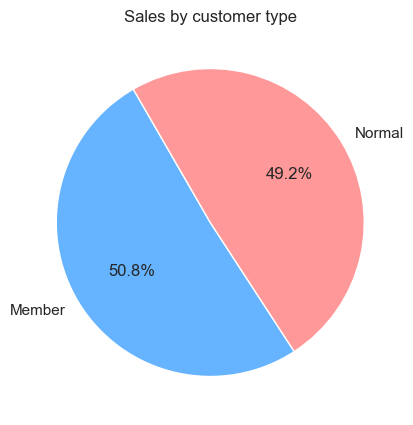

In [87]:
sales_Customer_type=df.groupby('Customer type')['Total'].sum()
ax=plt.pie(sales_Customer_type,labels=sales_Customer_type.index,autopct='%1.1f%%',colors=['#66b3ff', '#ff9999'], startangle=120)
plt.title('Sales by customer type')
plt.show()

Customer with membership purchased slightly more than normal customer

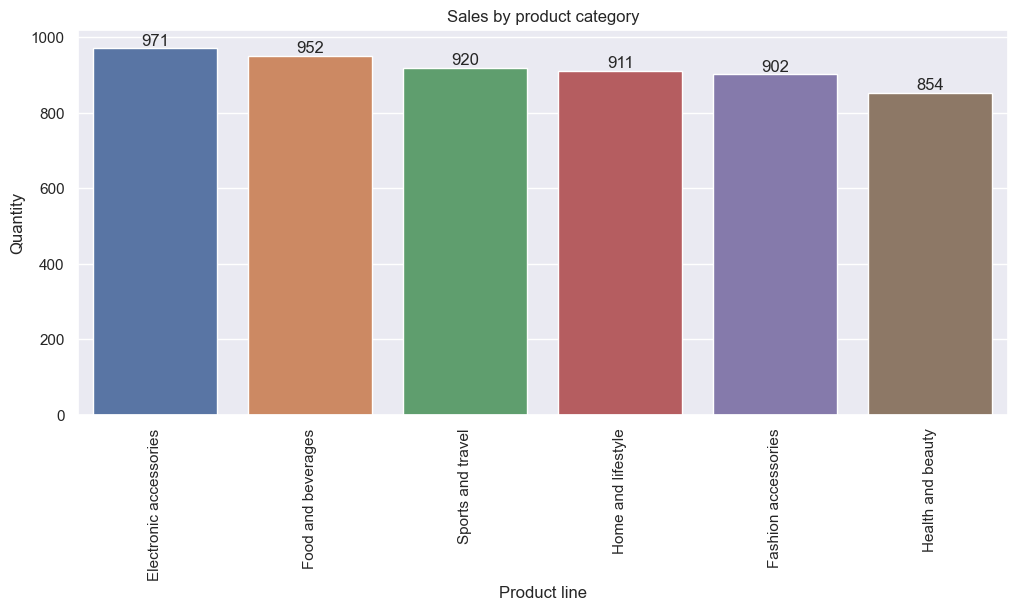

In [92]:
sns.set(rc={'figure.figsize':(12,5)})
sales_Product_line=df.groupby(['Product line'],as_index=False)['Quantity'].sum().sort_values(by=['Quantity'],ascending=False)
ax=sns.barplot(x='Product line',y='Quantity',hue='Product line',data=sales_Product_line)
plt.ylabel('Quantity')
plt.title('Sales by product category')
plt.xticks(rotation=90)

for bar in ax.containers:
    ax.bar_label(bar)

plt.show()

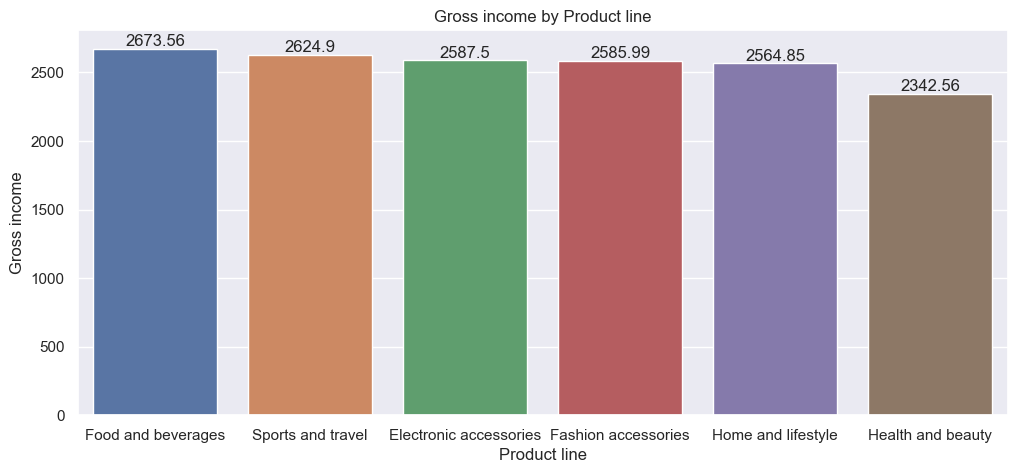

In [98]:
gross_income_Product_line=df.groupby(['Product line'],as_index=False)['gross income'].sum().sort_values(by=['gross income'],ascending=False)
ax=sns.barplot(x='Product line',y='gross income',hue='Product line',data=gross_income_Product_line)
plt.ylabel('Gross income')
plt.title('Gross income by Product line')

for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

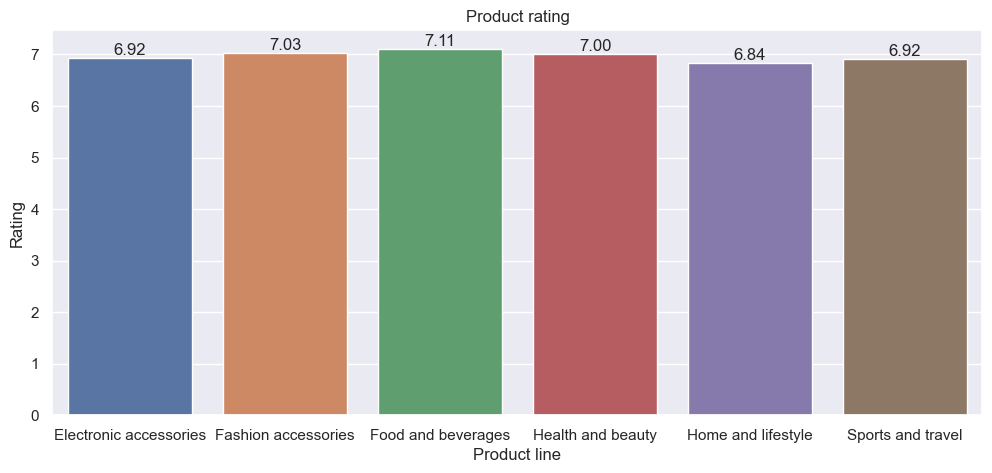

In [122]:
product_rating=df.groupby(['Product line'],as_index=False)['Rating'].mean()
ax=sns.barplot(x='Product line',y='Rating',hue='Product line',data=product_rating)
plt.ylabel('Rating')
plt.title('Product rating')

for bar in ax.containers:
    ax.bar_label(bar,fmt='%.2f')
plt.show()

#ax=sns.barplot(x='Product line',y='Rating',data=df)
#plt.ylabel('Rating')
#plt.title('Product rating')

#for bar in ax.containers:
 #   ax.bar_label(bar,fmt='%.0f')
#plt.show()


Electronic accessories  is slightly more than others but Food & beverages gross margin is more

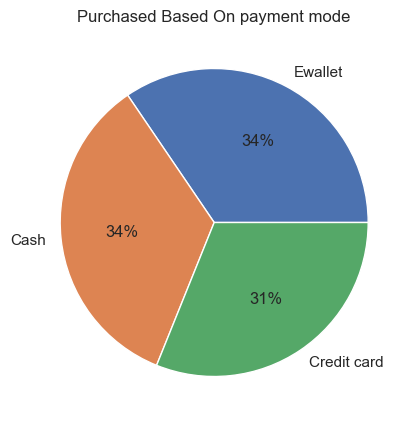

In [107]:

purchased_mode_payment=df['Payment'].value_counts()
#purchased_mode_payment
plt.pie(purchased_mode_payment,labels=purchased_mode_payment.index,autopct='%1.0f%%')
plt.title('Purchased Based On payment mode') 
plt.show()

#sns.set(rc={'figure.figsize':(5,5)})
#plt.pie(total_pucrhased_gender_counts,labels=total_pucrhased_gender_counts.index,autopct='%1.1f%%',colors=['#66b3ff', '#ff9999'], startangle=120)
#plt.title('Purchased Based On Gender')  
#plt.show()



Payment  made by credit card are slightly less as compared to cash and ewallet.

In [124]:
#df['month']=df['date'].dt.month
df['month'] = df['Date'].dt.month


In [127]:
df['month_name'] = df['Date'].dt.strftime('%B')


In [128]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,month_name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,February


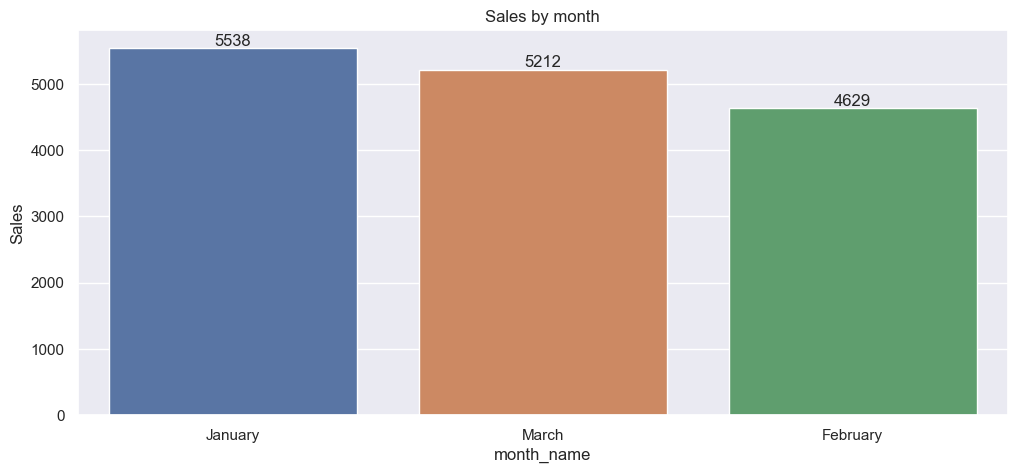

In [141]:
sales_month=df.groupby(['month_name'],as_index=False)['gross income'].sum().sort_values(by=['gross income'],ascending=False)
ax=sns.barplot(x='month_name',y='gross income',hue='month_name',data=sales_month)
plt.ylabel('Sales')
plt.title('Sales by month')

for bar in ax.containers:
    ax.bar_label(bar,fmt='%.0f')
plt.show()

In january Sales are more as compared to other month

## Conclusion:
##

- Female customers spend slightly more than male customers.
- Branch C has slightly higher sales and gross margin compared to other branches.
- Naypyitaw City leads in sales and gross margin among all cities.
- Customers with membership make slightly more purchases than non-members.
- Electronic accessories category shows higher sales, while Food & Beverages has a higher gross margin.
- Credit card payments are slightly less common compared to cash and e-wallet payments.
- Sales are higher in January compared to other months.

githublink:https://github.com/ShahRizwan007/Supermarket_sales_python_project

linkdin:www.linkedin.com/in/shahrizwan819

                                                               THANK YOU 